# <font color=pink> Tiktok Analysis

<b> claim_status:</b> Indica se o vídeo foi reportado por conter uma afirmação ou opinião (ex.: 'Reportado', 'Não Reportado').<br>
<b> video_id: </b>Identificador único para cada vídeo.<br>
<b> video_duration_sec:</b> Duração do vídeo em segundos.<br>
<b> video_transcription_text: </b>Transcrição do conteúdo de áudio do vídeo.<br>
<b> verified_status:</b> Indica se a conta do criador do vídeo é verificada (ex.: 'Verificado', 'Não Verificado').<br>
<b> author_ban_status: </b>Indica se o autor do vídeo foi banido (ex.: 'Banido', 'Não Banido').<br>
<b> video_view_count: </b>Número total de visualizações que o vídeo recebeu.<br>
<b> video_like_count:</b> Número total de curtidas que o vídeo recebeu.<br>
<b> video_share_count: </b>Número total de vezes que o vídeo foi compartilhado.<br>
<b> video_download_count:</b> Número total de vezes que o vídeo foi baixado.<br>
<b> video_comment_count:</b> Número total de comentários no vídeo.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tiktok_dataset.csv')

In [3]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


## <font color=pink> Tempo médio de cada vídeo

In [5]:
df['video_duration_sec'].mean()

np.float64(32.42173150345682)

## <font color=pink> Verificando valores nulos

In [6]:
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [7]:
df.count()

#                           19382
claim_status                19084
video_id                    19382
video_duration_sec          19382
video_transcription_text    19084
verified_status             19382
author_ban_status           19382
video_view_count            19084
video_like_count            19084
video_share_count           19084
video_download_count        19084
video_comment_count         19084
dtype: int64

In [8]:
df.shape

(19382, 12)

## <font color=pink> Removendo linhas com valores nulos

In [9]:
df = df.dropna()
df = df.dropna(axis=1)

In [10]:
df.shape

(19084, 12)

## <font color=pink> Analisando proporção de vídeos de contas verificadas X contas não verificadas

In [11]:
verificados = df.loc[df['verified_status'] == 'verified']
nao_verificados = df.loc[df['verified_status'] == 'not verified']

In [12]:
qtd_verificadas = len(verificados)
qtd_nao_verificadas = len(nao_verificados)

In [13]:
valores = [qtd_verificadas, qtd_nao_verificadas]
rótulos = ['Verificado', 'Não Verificado']

In [14]:
print(f"Contas verificadas: {qtd_verificadas}")
print(f"Contas não verificadas: {qtd_nao_verificadas}")

Contas verificadas: 1200
Contas não verificadas: 17884


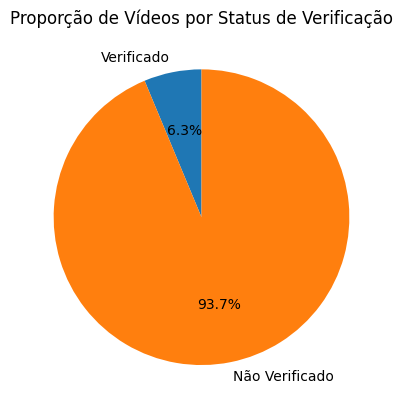

In [15]:
plt.pie(valores, labels=rótulos, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Vídeos por Status de Verificação')
plt.show()

In [16]:
verificados.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0
76,77,claim,2342638585,31,a friend shared with a friend that only one-fo...,verified,active,677288.0,214708.0,66446.0,2167.0,1428.0
105,106,claim,7687467484,49,a friend mentioned someone discovered that lon...,verified,under review,631075.0,284311.0,97442.0,1163.0,354.0
117,118,claim,2115386652,48,a friend mentioned someone discovered that bee...,verified,active,915553.0,272536.0,78299.0,7.0,3.0
140,141,claim,6296788623,16,a friend reported someone discovered that shan...,verified,active,775229.0,42657.0,1636.0,835.0,247.0


### <font color="pink"> Verificando proporção de vídeos banidos dos verificados

In [17]:
verificados['author_ban_status'].value_counts()

author_ban_status
active          1078
under review      77
banned            45
Name: count, dtype: int64

In [18]:
ativo = verificados.loc[df['author_ban_status'] == 'active']
analise = verificados.loc[df['author_ban_status'] == 'under review']
banido = verificados.loc[df['author_ban_status'] == 'banned']


In [19]:
valores = [len(ativo), len(analise), len(banido)]
rótulos = ['ativo', 'analise', 'banido']

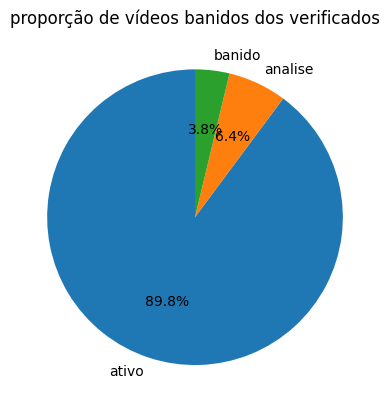

In [20]:
plt.pie(valores, labels=rótulos, autopct='%1.1f%%', startangle=90)
plt.title('proporção de vídeos banidos dos verificados')
plt.show()

### <font color="pink"> Verificando proporção de vídeos banidos dos não verificados

In [21]:
nao_verificados['author_ban_status'].value_counts()

author_ban_status
active          14305
under review     1989
banned           1590
Name: count, dtype: int64

In [22]:
ativo = nao_verificados.loc[df['author_ban_status'] == 'active']
analise = nao_verificados.loc[df['author_ban_status'] == 'under review']
banido = nao_verificados.loc[df['author_ban_status'] == 'banned']

In [23]:
valores = [len(ativo), len(analise), len(banido)]
rótulos = ['ativo', 'analise', 'banido']

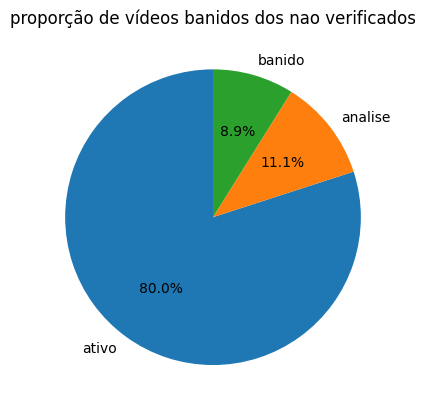

In [24]:
plt.pie(valores, labels=rótulos, autopct='%1.1f%%', startangle=90)
plt.title('proporção de vídeos banidos dos nao verificados')
plt.show()

## <font color="pink"> Analisando quantidade de vídeos por tempo de duração

In [25]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [26]:
ate10seg = df[df['video_duration_sec'] <= 10]
entre11e20seg = df[(df['video_duration_sec'] > 10) & (df['video_duration_sec'] <= 20)]
entre21e30seg = df[(df['video_duration_sec'] > 20) & (df['video_duration_sec'] <= 30)]
entre31e40seg = df[(df['video_duration_sec'] > 30) & (df['video_duration_sec'] <= 40)]
entre41e50seg = df[(df['video_duration_sec'] > 40) & (df['video_duration_sec'] <= 50)]
entre51e60seg = df[(df['video_duration_sec'] > 50) & (df['video_duration_sec'] <= 60)]

In [27]:
count_ate10seg = ate10seg.shape[0]
count_entre11e20seg = entre11e20seg.shape[0]
count_entre21e30seg = entre21e30seg.shape[0]
count_entre31e40seg = entre31e40seg.shape[0]
count_entre41e50seg = entre41e50seg.shape[0]
count_entre51e60seg = entre51e60seg.shape[0]


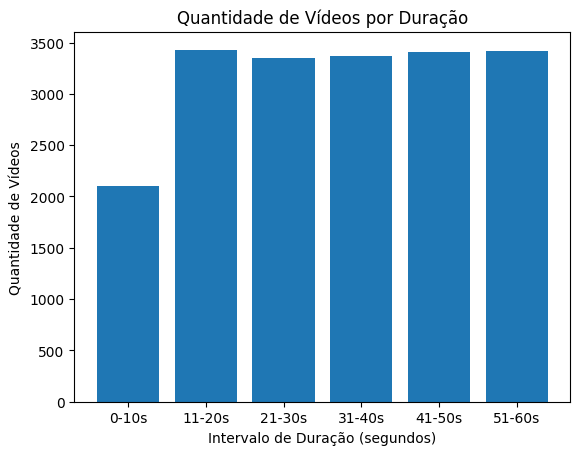

In [30]:
intervalos = ['0-10s', '11-20s', '21-30s', '31-40s', '41-50s', '51-60s']

quantidade_videos = [count_ate10seg, count_entre11e20seg, count_entre21e30seg, 
                     count_entre31e40seg, count_entre41e50seg, count_entre51e60seg]

plt.bar(intervalos, quantidade_videos)
plt.title('Quantidade de Vídeos por Duração')
plt.xlabel('Intervalo de Duração (segundos)')
plt.ylabel('Quantidade de Vídeos')

plt.show()

## <font color=pink> Qual duração média dos vídeos com mais de 500K de likes

In [38]:
maisde500k_likes = df[df['video_like_count'] > 500000]
maisde500k_likes['video_duration_sec'].describe()

count    326.000000
mean      33.184049
std       16.476833
min        5.000000
25%       19.000000
50%       34.000000
75%       47.750000
max       60.000000
Name: video_duration_sec, dtype: float64

In [39]:
maisde500k_likes.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
38,39,claim,2310167046,20,someone shared with me that jobs in the field ...,not verified,active,879368.0,572608.0,153090.0,5639.0,2542.0
63,64,claim,8244180015,37,a friend shared with a friend that a common ga...,not verified,active,986657.0,537842.0,199478.0,4721.0,2891.0
73,74,claim,3679640007,34,a friend shared with a friend that people are ...,not verified,active,929654.0,616498.0,97225.0,588.0,176.0
101,102,claim,9794898551,43,a friend mentioned someone discovered that 4 o...,not verified,banned,920337.0,567807.0,214550.0,4524.0,2850.0
102,103,claim,6445697344,33,a friend mentioned someone discovered that the...,not verified,active,995247.0,505255.0,156842.0,9099.0,3081.0


In [ ]:
df=df.drop('video_id', axis=1)

In [48]:
df.head()

,#,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
